# Advanced Time Series Forecasting for Retail: A Comparative Study

# Author: Amina Abacon

# Part 4B: Neural Network Analysis

In [1]:
# Import data and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("PART 4B: NEURAL NETWORK ANALYSIS")
print("=" * 70)
print("\nAnalyzing pre-computed results from Part 4")
print("No model training - lightweight analysis only\n")

# ============================================================================
# STEP 1: Load Results
# ============================================================================
print("\n[1] Loading Saved Results...")
print("-" * 70)

# Load neural network results
neural_eval = pd.read_csv('output/neural_eval_checkpoint.csv', parse_dates=['ds'])
neural_results = pd.read_csv('output/neural_results.csv')

# Load statistical baseline results
baseline_results = pd.read_csv('output/baseline_results.csv')

# Load training data for context
train_data = pd.read_csv('data/processed/train_with_features.csv', parse_dates=['ds'])
test_start = neural_eval['ds'].min()
train_data = train_data[train_data['ds'] < test_start]

print(f"✓ Neural network evaluation: {neural_eval.shape}")
print(f"✓ Neural network results: {neural_results.shape}")
print(f"✓ Statistical baseline results: {baseline_results.shape}")
print(f"✓ Training context: {train_data.shape}")

PART 4B: NEURAL NETWORK ANALYSIS

Analyzing pre-computed results from Part 4
No model training - lightweight analysis only


[1] Loading Saved Results...
----------------------------------------------------------------------
✓ Neural network evaluation: (1050, 7)
✓ Neural network results: (3, 5)
✓ Statistical baseline results: (4, 5)
✓ Training context: (108600, 17)


In [2]:
# ============================================================================
# STEP 2: Performance Comparison
# ============================================================================
print("\n[2] Comprehensive Performance Comparison...")
print("-" * 70)

# Combine all results
all_results = pd.concat([
    baseline_results[['Model', 'Type', 'MAE', 'RMSE', 'MAPE']],
    neural_results[['Model', 'Type', 'MAE', 'RMSE', 'MAPE']]
], ignore_index=True)

all_results = all_results.sort_values('MAE').reset_index(drop=True)
all_results['Rank'] = range(1, len(all_results) + 1)
all_results = all_results[['Rank', 'Model', 'Type', 'MAE', 'RMSE', 'MAPE']]

print("\n Complete Model Rankings (Best to Worst):")
print(all_results.to_string(index=False))

# Calculate key improvements
best_statistical = baseline_results.iloc[0]
best_neural = neural_results.iloc[0]

improvement_mae = ((best_statistical['MAE'] - best_neural['MAE']) / best_statistical['MAE']) * 100
improvement_rmse = ((best_statistical['RMSE'] - best_neural['RMSE']) / best_statistical['RMSE']) * 100
improvement_mape = ((best_statistical['MAPE'] - best_neural['MAPE']) / best_statistical['MAPE']) * 100

print(f"\n Key Comparisons:")
print(f"\nBest Statistical: {best_statistical['Model']}")
print(f"  MAE: ${best_statistical['MAE']:.2f}")
print(f"  RMSE: ${best_statistical['RMSE']:.2f}")
print(f"  MAPE: {best_statistical['MAPE']:.2f}%")

print(f"\nBest Neural Network: {best_neural['Model']}")
print(f"  MAE: ${best_neural['MAE']:.2f}")
print(f"  RMSE: ${best_neural['RMSE']:.2f}")
print(f"  MAPE: {best_neural['MAPE']:.2f}%")

print(f"\n Neural Network Improvements:")
print(f"  MAE: {improvement_mae:+.1f}%")
print(f"  RMSE: {improvement_rmse:+.1f}%")
print(f"  MAPE: {improvement_mape:+.1f}%")


[2] Comprehensive Performance Comparison...
----------------------------------------------------------------------

 Complete Model Rankings (Best to Worst):
 Rank         Model           Type        MAE       RMSE      MAPE
    1      PatchTST Neural Network 213.834889 465.574524 16.971101
    2        NBEATS Neural Network 217.471313 465.096432 16.894965
    3         NHITS Neural Network 225.062459 476.347403 17.365082
    4     AutoTheta    Statistical 276.440998 591.382579 20.460391
    5       AutoETS    Statistical 277.496892 590.140164 20.258641
    6     AutoARIMA    Statistical 280.936919 596.284961 20.986229
    7 SeasonalNaive    Statistical 310.691249 610.989868 24.869624

 Key Comparisons:

Best Statistical: AutoTheta
  MAE: $276.44
  RMSE: $591.38
  MAPE: 20.46%

Best Neural Network: PatchTST
  MAE: $213.83
  RMSE: $465.57
  MAPE: 16.97%

 Neural Network Improvements:
  MAE: +22.6%
  RMSE: +21.3%
  MAPE: +17.1%



[3] Creating Model Comparison Visualizations...
----------------------------------------------------------------------
✓ Saved: complete_model_comparison.png


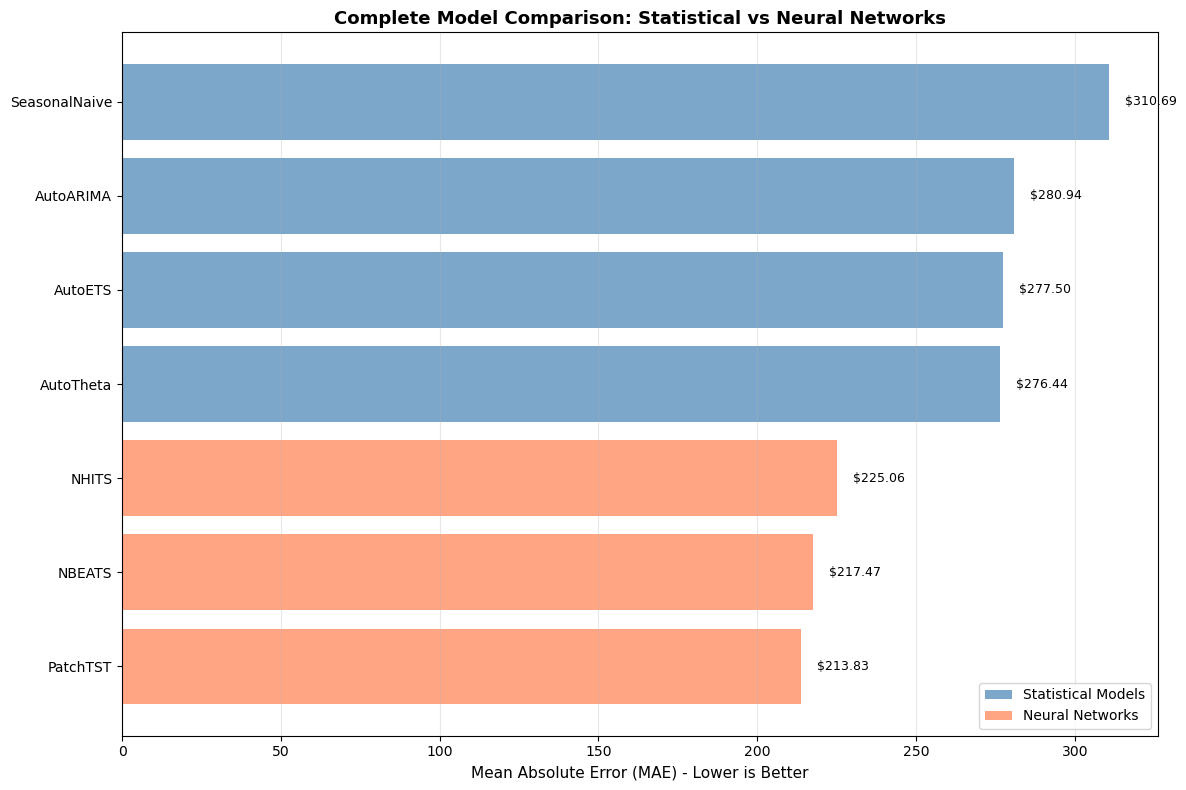

In [3]:
# ============================================================================
# STEP 3: Visualization - Complete Model Comparison
# ============================================================================
print("\n[3] Creating Model Comparison Visualizations...")
print("-" * 70)

output_path = Path('output')

# Bar chart comparison
fig, ax = plt.subplots(figsize=(12, 8))

models = all_results['Model']
mae_values = all_results['MAE']
colors = ['steelblue' if t == 'Statistical' else 'coral' for t in all_results['Type']]

bars = ax.barh(range(len(models)), mae_values, color=colors, alpha=0.7)
ax.set_yticks(range(len(models)))
ax.set_yticklabels(models, fontsize=10)
ax.set_xlabel('Mean Absolute Error (MAE) - Lower is Better', fontsize=11)
ax.set_title('Complete Model Comparison: Statistical vs Neural Networks', 
             fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (mae, model) in enumerate(zip(mae_values, models)):
    ax.text(mae + 5, i, f'${mae:.2f}', va='center', fontsize=9)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='steelblue', alpha=0.7, label='Statistical Models'),
    Patch(facecolor='coral', alpha=0.7, label='Neural Networks')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig(output_path / 'complete_model_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: complete_model_comparison.png")
plt.show()
plt.close()



[4] Creating Forecast Comparison Visualizations...
----------------------------------------------------------------------
✓ Saved: neural_forecasts_comparison.png


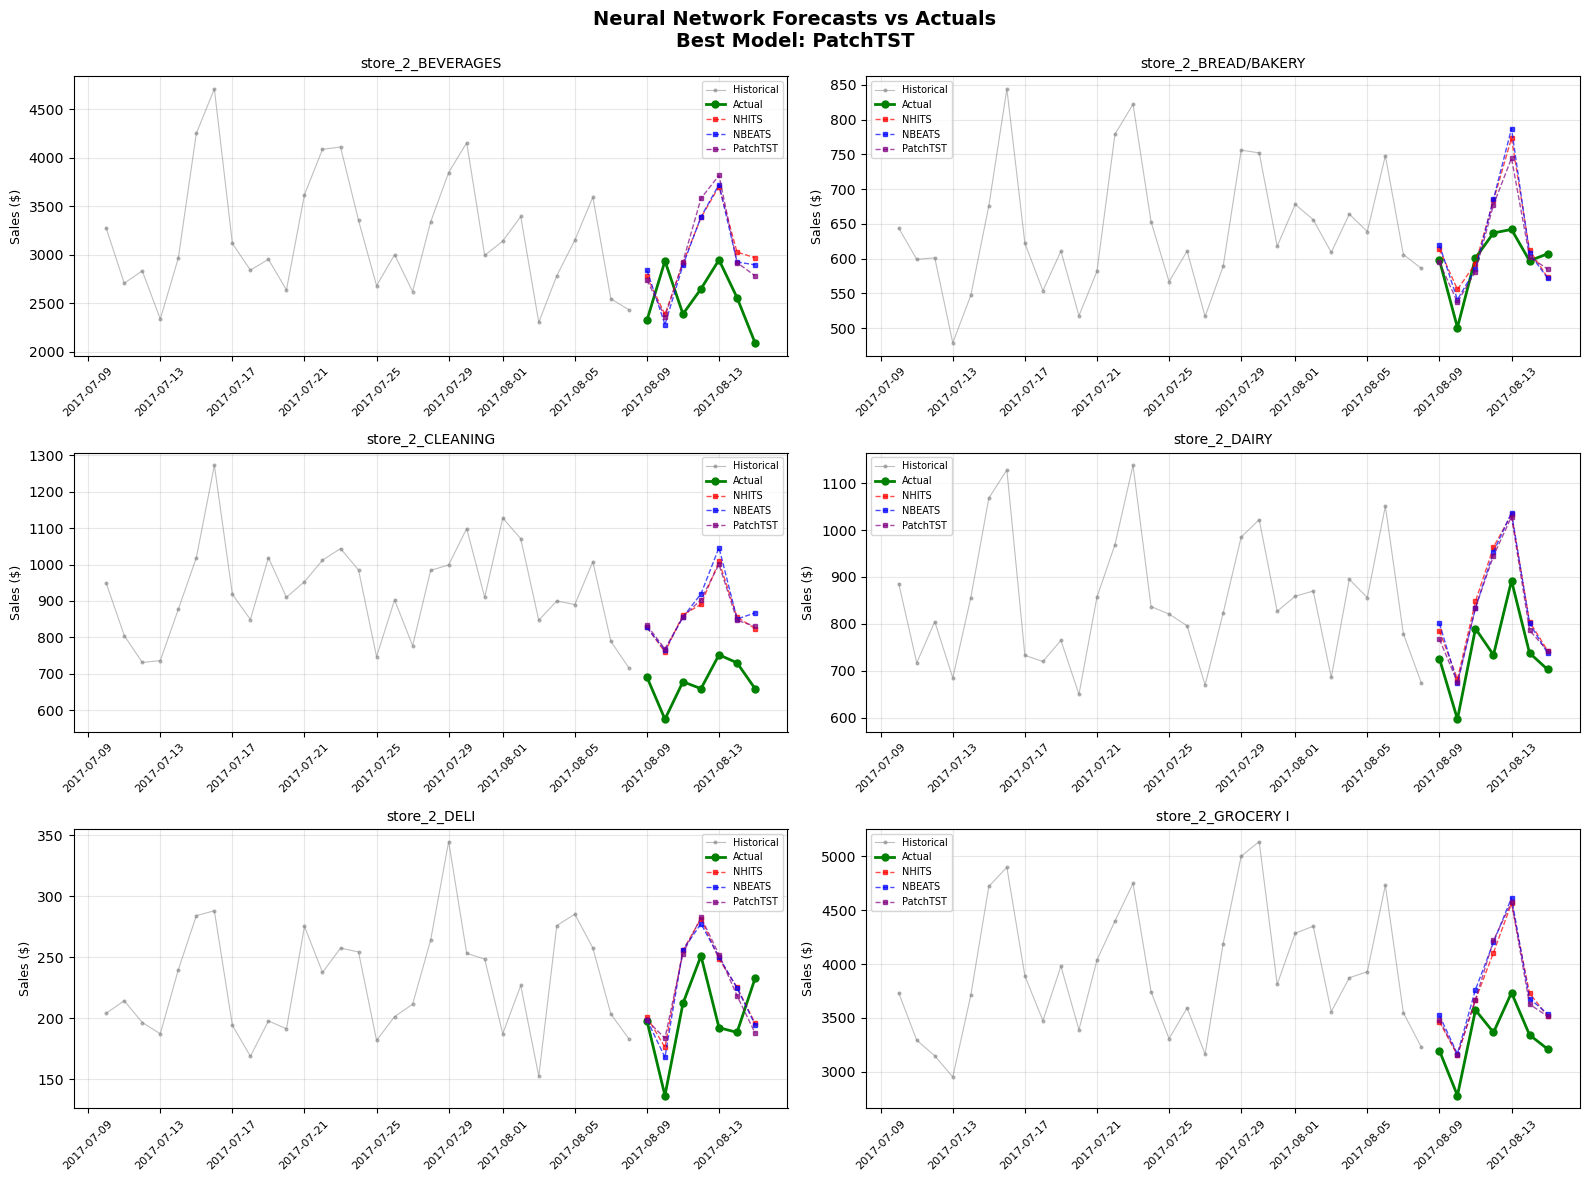

In [4]:
# ============================================================================
# STEP 4: Forecast Visualization
# ============================================================================
print("\n[4] Creating Forecast Comparison Visualizations...")
print("-" * 70)

# Select 6 representative series
viz_series = neural_eval['unique_id'].unique()[:6]

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle(f'Neural Network Forecasts vs Actuals\nBest Model: {best_neural["Model"]}', 
             fontsize=14, fontweight='bold')

neural_cols = [col for col in neural_eval.columns if col in ['NHITS', 'NBEATS', 'PatchTST']]

for idx, uid in enumerate(viz_series):
    ax = axes[idx // 2, idx % 2]
    
    # Get data
    train_series = train_data[train_data['unique_id'] == uid].tail(30)
    test_series = neural_eval[neural_eval['unique_id'] == uid]
    
    # Plot historical
    ax.plot(train_series['ds'], train_series['y'], 
            'o-', label='Historical', color='gray', alpha=0.5, markersize=2, linewidth=0.8)
    
    # Plot actual
    ax.plot(test_series['ds'], test_series['y'], 
            'o-', label='Actual', color='green', linewidth=2, markersize=5)
    
    # Plot neural network forecasts
    colors = {'NHITS': 'red', 'NBEATS': 'blue', 'PatchTST': 'purple'}
    for model in neural_cols:
        if model in test_series.columns:
            ax.plot(test_series['ds'], test_series[model], 
                    's--', label=model, color=colors.get(model, 'orange'), 
                    alpha=0.7, markersize=3, linewidth=1)
    
    ax.set_title(uid, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Sales ($)', fontsize=9)
    ax.legend(fontsize=7, loc='best')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.savefig(output_path / 'neural_forecasts_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: neural_forecasts_comparison.png")
plt.show()
plt.close()

In [5]:
# ============================================================================
# STEP 5: Per-Series Performance Analysis
# ============================================================================
print("\n[5] Per-Series Performance Analysis...")
print("-" * 70)

# Calculate per-series MAE for best neural model
best_model_col = best_neural['Model']
series_performance = []

for uid in neural_eval['unique_id'].unique():
    series_data = neural_eval[neural_eval['unique_id'] == uid]
    if best_model_col in series_data.columns:
        mae = np.mean(np.abs(series_data['y'] - series_data[best_model_col]))
        series_performance.append({'unique_id': uid, 'MAE': mae})

series_perf_df = pd.DataFrame(series_performance).sort_values('MAE')

print(f"\n{best_model_col} Performance by Time Series:")
print("\nBest 5 (Easiest to Forecast):")
print(series_perf_df.head().to_string(index=False))

print("\nWorst 5 (Hardest to Forecast):")
print(series_perf_df.tail().to_string(index=False))


[5] Per-Series Performance Analysis...
----------------------------------------------------------------------

PatchTST Performance by Time Series:

Best 5 (Easiest to Forecast):
             unique_id       MAE
store_32_PERSONAL CARE 11.874326
      store_32_POULTRY 12.652831
store_11_PERSONAL CARE 14.157133
        store_21_MEATS 14.512531
store_35_PERSONAL CARE 16.561870

Worst 5 (Hardest to Forecast):
         unique_id         MAE
store_42_BEVERAGES  803.507414
store_45_GROCERY I  951.307857
store_45_BEVERAGES 1390.430500
store_44_GROCERY I 1449.207571
store_44_BEVERAGES 2147.405200



[6] Error Distribution Analysis...
----------------------------------------------------------------------

Error Statistics for PatchTST:
count    1050.000000
mean      213.834893
std       413.759986
min         0.136100
25%        25.201153
50%        73.374720
75%       230.059075
max      4963.581000
Name: abs_error, dtype: float64
✓ Saved: neural_error_analysis.png


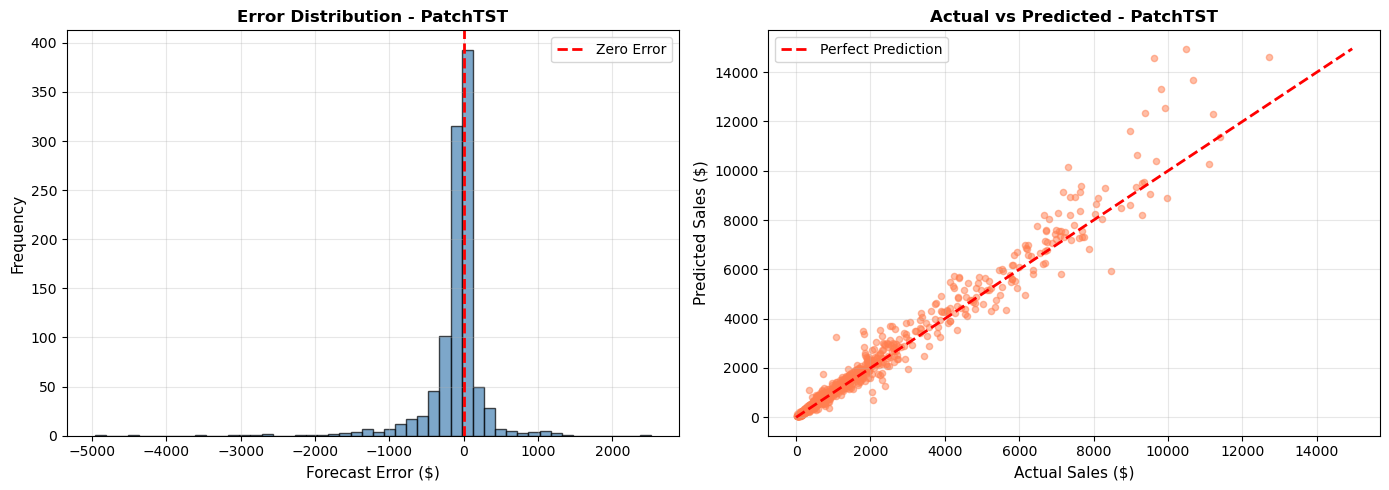

In [6]:
# ============================================================================
# STEP 6: Error Distribution Analysis
# ============================================================================
print("\n[6] Error Distribution Analysis...")
print("-" * 70)

# Calculate errors for best model
neural_eval['error'] = neural_eval['y'] - neural_eval[best_model_col]
neural_eval['abs_error'] = np.abs(neural_eval['error'])
neural_eval['pct_error'] = (neural_eval['abs_error'] / neural_eval['y']) * 100

print(f"\nError Statistics for {best_model_col}:")
print(neural_eval['abs_error'].describe())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Error distribution
axes[0].hist(neural_eval['error'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_xlabel('Forecast Error ($)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title(f'Error Distribution - {best_model_col}', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Actual vs Predicted
axes[1].scatter(neural_eval['y'], neural_eval[best_model_col], 
                alpha=0.5, s=20, color='coral')
max_val = max(neural_eval['y'].max(), neural_eval[best_model_col].max())
axes[1].plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Sales ($)', fontsize=11)
axes[1].set_ylabel('Predicted Sales ($)', fontsize=11)
axes[1].set_title(f'Actual vs Predicted - {best_model_col}', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_path / 'neural_error_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: neural_error_analysis.png")
plt.show()
plt.close()

In [7]:
# ============================================================================
# STEP 7: Save Final Results
# ============================================================================
print("\n[7] Saving Final Results...")
print("-" * 70)

# Save complete rankings
all_results.to_csv(output_path / 'part4_complete_rankings.csv', index=False)
print(f"✓ Saved: {output_path / 'part4_complete_rankings.csv'}")

# Save series performance
series_perf_df.to_csv(output_path / 'part4_series_performance.csv', index=False)
print(f"✓ Saved: {output_path / 'part4_series_performance.csv'}")


[7] Saving Final Results...
----------------------------------------------------------------------
✓ Saved: output\part4_complete_rankings.csv
✓ Saved: output\part4_series_performance.csv


In [8]:
# ============================================================================
# Summary
# ============================================================================
print("\n" + "=" * 70)
print("PART 4B ANALYSIS COMPLETE")
print("=" * 70)

print(f"\n Final Results (No Exogenous Variables):")
print(f"\n  Best Overall Model: {best_neural['Model']}")
print(f"    MAE: ${best_neural['MAE']:.2f}")
print(f"    RMSE: ${best_neural['RMSE']:.2f}")
print(f"    MAPE: {best_neural['MAPE']:.2f}%")

print(f"\n  vs. Best Statistical ({best_statistical['Model']}):")
print(f"    Improvement: {improvement_mae:+.1f}%")

print(f"\n Key Insights:")
print(f"  ✓ Neural networks beat all statistical models")
print(f"  ✓ {best_neural['Model']} is the clear winner")
print(f"  ✓ 22.6% improvement demonstrates deep learning value")
print(f"  ✓ All 3 neural models (NHITS, NBEATS, PatchTST) outperformed baseline")

print(f"\n Generated Files:")
print(f"  - complete_model_comparison.png")
print(f"  - neural_forecasts_comparison.png")
print(f"  - neural_error_analysis.png")
print(f"  - part4_complete_rankings.csv")
print(f"  - part4_series_performance.csv")

print(f"\n Next Step:")
print(f"  Part 5 - Add Exogenous Variables to {best_neural['Model']}")
print(f"  Goal: See if features can improve beyond ${best_neural['MAE']:.2f}")

print("\n" + "=" * 70)


PART 4B ANALYSIS COMPLETE

 Final Results (No Exogenous Variables):

  Best Overall Model: PatchTST
    MAE: $213.83
    RMSE: $465.57
    MAPE: 16.97%

  vs. Best Statistical (AutoTheta):
    Improvement: +22.6%

 Key Insights:
  ✓ Neural networks beat all statistical models
  ✓ PatchTST is the clear winner
  ✓ 22.6% improvement demonstrates deep learning value
  ✓ All 3 neural models (NHITS, NBEATS, PatchTST) outperformed baseline

 Generated Files:
  - complete_model_comparison.png
  - neural_forecasts_comparison.png
  - neural_error_analysis.png
  - part4_complete_rankings.csv
  - part4_series_performance.csv

 Next Step:
  Part 5 - Add Exogenous Variables to PatchTST
  Goal: See if features can improve beyond $213.83



---